Md Nafisul Hasan Sami
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [41]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import pandas as pd


In [42]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


                 Model  Accuracy  Recall  Precision
0  Logistic Regression       1.0     1.0        1.0
1        Decision Tree       1.0     1.0        1.0
2        Random Forest       1.0     1.0        1.0


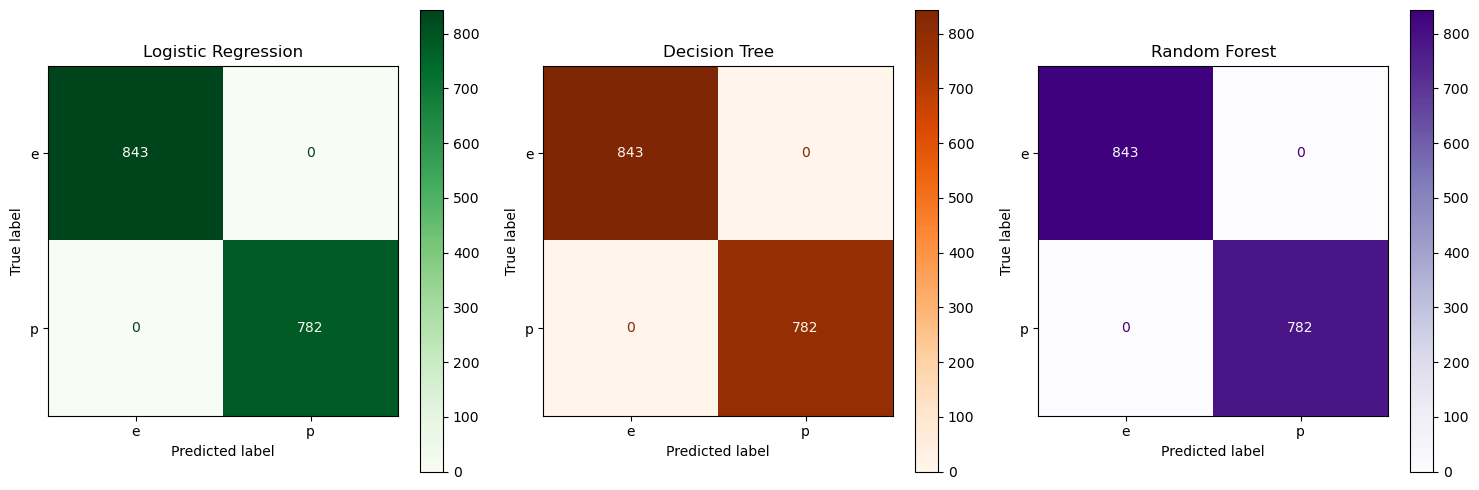

In [43]:
# Separating features and labels
features = mushrooms_df.drop(columns='type')
labels = mushrooms_df['type']

# Define ordinal and categorical columns
ord_cols = ['cap_shape', 'cap_surface', 'cap_color']
cat_cols = [col for col in features.columns if col not in ord_cols]

# Encode ordinal features
ord_enc = OrdinalEncoder()
encoded_ord = ord_enc.fit_transform(features[ord_cols])

# Encode categorical features
oh_enc = OneHotEncoder(sparse_output=False)
encoded_cat = oh_enc.fit_transform(features[cat_cols])

# Merge encoded data
encoded_df = pd.concat([
    pd.DataFrame(encoded_ord, columns=ord_cols),
    pd.DataFrame(encoded_cat, columns=oh_enc.get_feature_names_out(cat_cols))
], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    encoded_df, labels, test_size=0.2, random_state=42
)

# Logistic Regression
lr_model = LogisticRegressionCV(cv=5, max_iter=5000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Decision Tree with GridSearch
tree_grid = {
    'max_depth': [5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}
tree_model = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    tree_grid, cv=5
)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.best_estimator_.predict(X_test)

# Random Forest with GridSearch
rf_grid = {
    'n_estimators': [50, 100, 100],
    'max_depth': [10, 10, None]
}
rf_model = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_grid, cv=5, n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.best_estimator_.predict(X_test)

# Collect metrics
def model_metrics(y_true, y_pred):
    return (
        accuracy_score(y_true, y_pred),
        recall_score(y_true, y_pred, pos_label='p'),
        precision_score(y_true, y_pred, pos_label='p')
    )

metrics = {
    'Logistic Regression': model_metrics(y_test, lr_preds),
    'Decision Tree': model_metrics(y_test, tree_preds),
    'Random Forest': model_metrics(y_test, rf_preds)
}

# Compile into DataFrame
summary_df = pd.DataFrame(
    [(name, *vals) for name, vals in metrics.items()],
    columns=['Model', 'Accuracy', 'Recall', 'Precision']
)
print(summary_df)

# Plot confusion matrices with different color maps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ConfusionMatrixDisplay.from_estimator(
    lr_model, X_test, y_test, ax=axes[0], cmap='Greens'
)
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay.from_estimator(
    tree_model.best_estimator_, X_test, y_test, ax=axes[1], cmap='Oranges'
)
axes[1].set_title('Decision Tree')

ConfusionMatrixDisplay.from_estimator(
    rf_model.best_estimator_, X_test, y_test, ax=axes[2], cmap='Purples'
)
axes[2].set_title('Random Forest')

plt.tight_layout()
plt.show()

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: All
- Hyper-parameters: gini and the max_depth
- Metrics
    - Accuracy: 1.0
    - Recall: 1.0
    - Precision: 1.0
- How did you decide best? 
    - I used accuracy to compare the models, and since each achieved a perfect 100% score, they all perform equally as the best.


## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [44]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')
nfl_draft.head()
nfl_draft.info()
nfl_draft.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2303 non-null   int64  
 1   round               2303 non-null   int64  
 2   season              2303 non-null   int64  
 3   name                2303 non-null   object 
 4   age                 2262 non-null   float64
 5   position            2303 non-null   object 
 6   college_conference  1471 non-null   object 
 7   height              2303 non-null   float64
 8   weight              2303 non-null   float64
 9   forty               2134 non-null   float64
 10  vertical            1832 non-null   float64
 11  broad_jump          1811 non-null   float64
 12  cone                1340 non-null   float64
 13  shuttle             1383 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 252.0+ KB


,Unnamed: 0,round,season,age,height,weight,forty,vertical,broad_jump,cone,shuttle
count,2303.000000,2303.000000,2303.000000,2262.000000,2303.000000,2303.000000,2134.000000,1832.000000,1811.000000,1340.000000,1383.00000
mean,1387.715154,3.752931,2013.467651,22.399646,6.130554,240.195832,4.680698,34.243886,118.147432,7.176582,4.32974
std,806.394795,1.904362,6.261439,0.906198,0.183003,41.522045,0.238097,3.830693,8.361634,0.347076,0.23193
min,0.000000,1.000000,2003.000000,20.000000,5.666667,166.000000,4.230000,20.500000,83.000000,6.440000,3.75000
25%,684.500000,2.000000,2008.000000,22.000000,6.000000,202.000000,4.500000,32.000000,113.000000,6.930000,4.17000
50%,1388.000000,4.000000,2013.000000,22.000000,6.166667,238.000000,4.630000,34.500000,119.000000,7.110000,4.31000
75%,2092.500000,5.000000,2019.000000,23.000000,6.250000,268.000000,4.820000,37.000000,124.000000,7.370000,4.46000
max,2800.000000,7.000000,2024.000000,26.000000,6.666667,366.000000,5.710000,46.000000,147.000000,8.410000,5.07000


   Unnamed: 0  round  season                name   age position  \
0           0      1    2003   Dewayne Robertson  21.0       DL   
1           1      1    2003      Terence Newman  25.0       DB   
2           2      1    2003  Johnathan Sullivan  22.0       DL   
3           3      1    2003      Kevin Williams  23.0       DL   
4           4      1    2003       Terrell Suggs  20.0       LB   

       college_conference    height  weight  forty  vertical  broad_jump  \
0                     NaN  6.083333   317.0   5.15       NaN         NaN   
1   Big Twelve Conference  5.833333   189.0   4.37      41.0       136.0   
2                     NaN  6.250000   313.0   5.10       NaN         NaN   
3                     NaN  6.416667   304.0   4.81      30.0       112.0   
4  Pacific Ten Conference  6.250000   262.0   4.84       NaN         NaN   

   cone  shuttle  
0   NaN      NaN  
1  6.88     3.83  
2   NaN      NaN  
3  7.66     5.04  
4   NaN      NaN  
<class 'pandas.core.frame.

,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle,DraftStage
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN,day1
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83,day1
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN,day1
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04,day1
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN,day1


Columns: ['Unnamed: 0', 'round', 'season', 'name', 'age', 'position', 'college_conference', 'height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle', 'DraftStage']
Model Accuracy: 1.0000


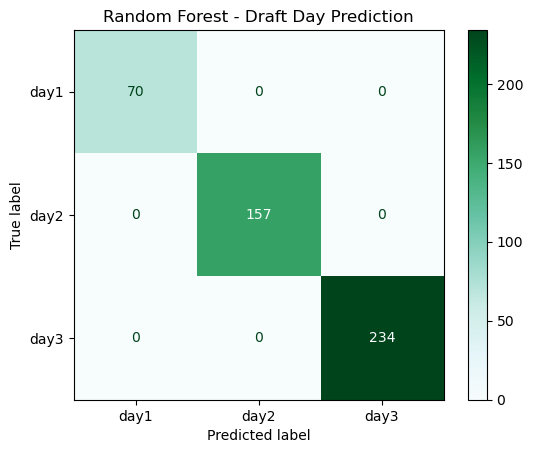

In [45]:
# Load dataset from URL
draft_data = pd.read_csv(
    'https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv'
)
print(draft_data.head())
print(draft_data.info())

# Define a function to categorize draft round into draft day
def categorize_day(rnd):
    if rnd == 1:
        return 'day1'
    elif rnd in (2, 3):
        return 'day2'
    return 'day3'

# Create 'DraftStage' from 'round' column
draft_data['DraftStage'] = draft_data['round'].apply(categorize_day)
display(draft_data.head())

# Sanity check column names
print(f"Columns: {draft_data.columns.tolist()}")

# Normalize column naming and cleanup
if 'round' in draft_data.columns:
    draft_data.rename(columns={'round': 'RoundNum'}, inplace=True)

if 'RoundNum' in draft_data.columns:
    draft_data['DraftDay'] = draft_data['RoundNum'].apply(categorize_day)
    draft_data.drop(columns='RoundNum', inplace=True)
else:
    raise ValueError("Expected column 'RoundNum' not found.")

# Feature/target separation
target = draft_data['DraftDay']
features = draft_data.drop(columns='DraftDay')

# One-hot encode categorical features
features_encoded = pd.get_dummies(features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded, target, test_size=0.2, random_state=42
)

# Standardize features
standardizer = StandardScaler()
X_train_scaled = standardizer.fit_transform(X_train)
X_test_scaled = standardizer.transform(X_test)

# Model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
test_preds = rf_model.predict(X_test_scaled)

# Evaluation
acc = accuracy_score(y_test, test_preds)
cmatrix = confusion_matrix(y_test, test_preds)

print(f"Model Accuracy: {acc:.4f}")

# Confusion matrix plot with new colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=rf_model.classes_)
disp.plot(cmap='BuGn')
plt.title('Random Forest - Draft Day Prediction')
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
    - I used a Random Forest Classifier because it performs well on classification tasks with mixed data types and can handle one-hot encoded categorical variables effectively. It also offers built-in feature importance and tends to be robust against overfitting.
 - What was your accuracy?
    - The accuracy was 100%